In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import xarray as xr

In [28]:
plastics = xr.open_dataset('../../data/plastics.nc',decode_times=False)

In [29]:
plastics['source'][:,0,:,:]=plastics['source'][:,0,:,:]/1e4

In [30]:
plastics['source'][1,0,:,:]

<xarray.DataArray 'source' (lat: 192, lon: 288)>
array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [8.942262e-25, 8.976245e-25, 8.231706e-25, ..., 7.942710e-25,
        7.877033e-25, 8.753930e-25],
       [5.480836e-25, 5.337161e-25, 5.379019e-25, ..., 5.562951e-25,
        5.509412e-25, 5.500690e-25],
       [1.652195e-24, 1.624885e-24, 1.618729e-24, ..., 1.661301e-24,
        1.664711e-24, 1.664760e-24]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    bin      int32 2
    nvars    int32 1
Attributes:
    Units:      kg/m2/s
    long_name:  Source of microplastics

In [31]:
plastics['source'][1,0,:,:]

<xarray.DataArray 'source' (lat: 192, lon: 288)>
array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [8.942262e-25, 8.976245e-25, 8.231706e-25, ..., 7.942710e-25,
        7.877033e-25, 8.753930e-25],
       [5.480836e-25, 5.337161e-25, 5.379019e-25, ..., 5.562951e-25,
        5.509412e-25, 5.500690e-25],
       [1.652195e-24, 1.624885e-24, 1.618729e-24, ..., 1.661301e-24,
        1.664711e-24, 1.664760e-24]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    bin      int32 2
    nvars    int32 1
Attributes:
    Units:      kg/m2/s
    long_name:  Source of microplastics

**1st-per bins**

In [13]:
import netCDF4 as nc   # Reading NetCDF4 files.
import numpy   as np   # For array operations.

## INPUT FILES
##agricutural
#infile = '../data/plastics.nc'
#indata = nc.Dataset(infile, 'r')

## READ DATA
#6 bins are included, which represent in the following order: 0.3, 2.5, 7, 15, 35 and 70 micrometers in diameter particles
#5 model sources (nvars) are included in the following order:  ocean, pop, dustpop, dust ag, roads, as described in the paper.
bini=plastics.variables['bin'][:]
nvarsi=plastics.variables['nvars'][:]
lati=plastics.variables['lat'][:]
loni=plastics.variables['lon'][:]
sources=plastics.variables['source'][:,:,:,:]

## SPLIT 6 BINS
## Multiple 6.e22 to change unit from kg/m2/s to molecule/cm2/s
## Change the number and unit_string if necessary

#emiss=sources
unit_string="kg/m2/s"
emiss=sources
#unit_string="molecular/cm2/s"
#emiss=6.e22*sources
#print(np.shape(emiss))

nsource = len(nvarsi)
source_string = ["ocean", "pop", "dustpop", "dustag", "roads"]
print('Number of sources:',nsource)

nbin = len(bini)
bin_string =['0p3','2p5','7','15','35','70'] #rename them if necessary
print('Number of bins:',nbin)

## OUTPUT EMISSION DATA PER SOURCE
## ONE FILE WITH ALL BINS
#for j in range(nbin): # use range(4) to only go through the first 4 bins
for j in range(6):
  print("Processing Bin No. ",j+1)
  outfile='./plastics_bin%s.nc'%(bin_string[j])
  outfile = nc.Dataset(outfile, 'w',format='NETCDF4_CLASSIC')
   ## CREATE dimensions AND variables
  nvars=outfile.createDimension('nvars',nsource)
  lat=outfile.createDimension('lat',len(lati))
  lon=outfile.createDimension('lon',len(loni))
  nvarss=outfile.createVariable('nvars',np.int32,('nvars',))
  lats=outfile.createVariable('lat','f4',('lat',))
  lons=outfile.createVariable('lon','f4',('lon',))
  Ems=outfile.createVariable('emission',np.float32,('nvars','lat','lon'))
  ## WRITE DATA
  lons[:]=loni
  lons.long_name="longitude"
  lons.units="Degree E"
  lats[:]=lati
  lats.long_name="latitude"
  lats.units="Degree N"
  nvarss[:]=nvarsi
  Ems[:,:,:]=emiss[j,:,:]
  Ems.long_name="Microplastics in bin %s"%(bin_string[j])
  Ems.units="%s"%(unit_string)
  outfile.close()

Number of sources: 5
Number of bins: 6
Processing Bin No.  1
Processing Bin No.  2
Processing Bin No.  3
Processing Bin No.  4
Processing Bin No.  5
Processing Bin No.  6


**2nd**

https://github.com/NCAR/musica-tutorial/blob/main/Rewrite_output.ipynb

In [67]:
import numpy as np # for array manipulation and basic scientific calculation
import xarray as xr # To read NetCDF files
from scipy.interpolate import griddata # Simple regridding
from netCDF4 import Dataset # To write NetCDF files


bini=plastics.variables['bin'][:]
nvarsi=plastics.variables['nvars'][:]
lati=plastics.variables['lat'][:]
loni=plastics.variables['lon'][:]
sources=plastics.variables['source'][:,:,:,:]

unit_string="kg/m2/s"
emiss=sources

ds_output='./plastics_bin%s.nc'%('_source1')
ds_output = Dataset(ds_output, 'w',format='NETCDF4_CLASSIC')

# First create the dimension of the netcdf, for this example it is just lat and lon
bin=ds_output.createDimension('bin',len(bini))
nvars=ds_output.createDimension('nvars',len(nvarsi))
lat = ds_output.createDimension('lat', len(lati))
lon = ds_output.createDimension('lon', len(loni))

# Then create the variables, this included the dimensions and tracers you want written into the file
bins=ds_output.createVariable('bin',np.int32,('bin',))
nvarss=ds_output.createVariable('nvars',np.int32,('nvars',))
lats = ds_output.createVariable('lat', 'f4', ('lat',))
lons = ds_output.createVariable('lon', 'f4', ('lon',))
Ems=ds_output.createVariable('emiss',np.float32,('bin','nvars','lat','lon'))

# You can also assign attributes to the files as well, such as units or molecular weights
#Ems.units="kg/m2/s"

# Now we can assign the values from the numpy arrays we have calculated above
bins[:]=bini
nvarss[:]=nvarsi
lons[:]=loni
lats[:]=lati

Ems[:,:,:,:]=emiss[:,:,:,:]
Ems.units="%s"%(unit_string)
# Be sure to close the netcdf at the end of each call or you may run into issues when trying to access it later in the code
ds_output.close()

**3nd-containing bins and nvar**

In [53]:
import netCDF4 as nc   # Reading NetCDF4 files.
import numpy   as np   # For array operations.

## INPUT FILES
##agricutural
#infile = '../data/plastics.nc'
#indata = nc.Dataset(infile, 'r')

## READ DATA
#6 bins are included, which represent in the following order: 0.3, 2.5, 7, 15, 35 and 70 micrometers in diameter particles
#5 model sources (nvars) are included in the following order:  ocean, pop, dustpop, dust ag, roads, as described in the paper.

nvarsi=plastics.variables['nvars'][:]
bini=plastics.variables['bin'][:]
lati=plastics.variables['lat'][:]
loni=plastics.variables['lon'][:]
sources=plastics.variables['source'][:,:,:,:]

## SPLIT 6 BINS
## Multiple 6.e22 to change unit from kg/m2/s to molecule/cm2/s
## Change the number and unit_string if necessary

#emiss=sources
unit_string="kg/m2/s"
emiss=sources
#unit_string="molecular/cm2/s"
#emiss=6.e22*sources
#print(np.shape(emiss))

#nsource = len(nvarsi)
#source_string = ["ocean", "pop", "dustpop", "dustag", "roads"]
#print('Number of sources:',nsource)

#nbin = len(bini)
#bin_string =['0p3','2p5','7','15','35','70'] #rename them if necessary
#print('Number of bins:',nbin)

## OUTPUT EMISSION DATA PER SOURCE
## ONE FILE WITH ALL BINS
#for j in range(nbin): # use range(4) to only go through the first 4 bins

  #print("Processing Bin No. ",j+1)
outfile='./plastics_bin%s.nc'%('_source')
outfile = nc.Dataset(outfile, 'w',format='NETCDF4_CLASSIC')
## CREATE dimensions AND variables
nvars=outfile.createDimension('nvars',len(nvarsi))
bin=outfile.createDimension('bin',len(bini))
lat=outfile.createDimension('lat',len(lati))
lon=outfile.createDimension('lon',len(loni))
nvarss=outfile.createVariable('nvars',np.int32,('nvars',))
bins=outfile.createVariable('bin',np.int32,('bin',))
lats=outfile.createVariable('lat','f4',('lat',))
lons=outfile.createVariable('lon','f4',('lon',))
Ems=outfile.createVariable('emiss',np.float32,('bin','nvars','lat','lon'))
  ## WRITE DATA
lons[:]=loni
lons.long_name="longitude"
lons.units="Degree E"
lats[:]=lati
lats.long_name="latitude"
lats.units="Degree N"
nvarss[:]=nvarsi
bins[:]=bini
Ems[:,:,:,:]=emiss[:,:,:,:]
Ems.long_name="Microplastics emission"%(bin_string[j])
Ems.units="%s"%(unit_string)
outfile.close()

PermissionError: [Errno 13] Permission denied: b'./plastics_bin_source.nc'

In [36]:
origin = xr.open_dataset('../../data/plastics.nc',decode_times=False)

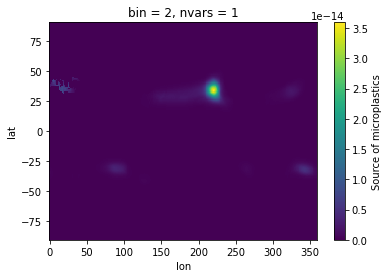

In [47]:
origin['source'][1,0,:,:].plot()

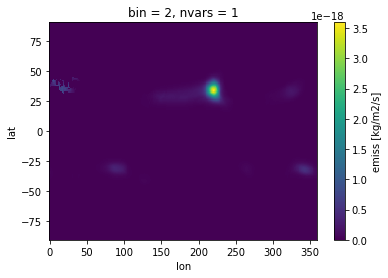

In [48]:
reout['emiss'][1,0,:,:].plot()

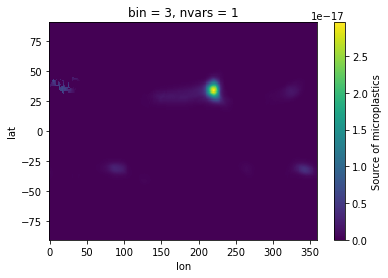

In [34]:
plastics['source'][2,0,:,:].plot()

In [40]:
    reout = xr.open_dataset('./plastics_bin_source.nc',decode_times=False)

In [41]:
reout

<xarray.Dataset>
Dimensions:  (bin: 6, nvars: 5, lat: 192, lon: 288)
Coordinates:
  * bin      (bin) int32 1 2 3 4 5 6
  * nvars    (nvars) int32 1 2 3 4 5
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    emiss    (bin, nvars, lat, lon) float32 ...

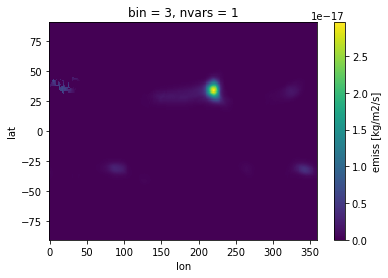

In [42]:
reout['emiss'][2,0,:,:].plot()